In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('drive/My Drive/Colab Notebooks/AI RESIDENCY/P1')

Mounted at /content/drive


In [ ]:
## Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

## ignore warnings
import warnings
warnings.filterwarnings("ignore",module = "matplotlib\..*")

In [ ]:
## Load data
data = pd.read_csv('ACME-HappinessSurvey2020.csv')
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

In [ ]:
## Shape 
print(data.shape)

(126, 7)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


- Data types : correct
- 0 Null values

In [ ]:
## Let's change the col. names to something more meaningful
data.rename(columns={'X1':'delivered_on_time', 
                     'X2':'contents_as_expected',
                     'X3':'ordered_everything_I_wanted',
                     'X4':'paid_a_good_price',
                     'X5':'satisfied_with_my_courier',
                     'X6':'app_makes_ordering_easy',
                     'Y':'Happy'},inplace=True)

In [ ]:
## Let's get some statistics
data.describe()

,Happy,delivered_on_time,contents_as_expected,ordered_everything_I_wanted,paid_a_good_price,satisfied_with_my_courier,app_makes_ordering_easy
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


- Values are in the correct range. 

Features (0-5), Target {0,1}

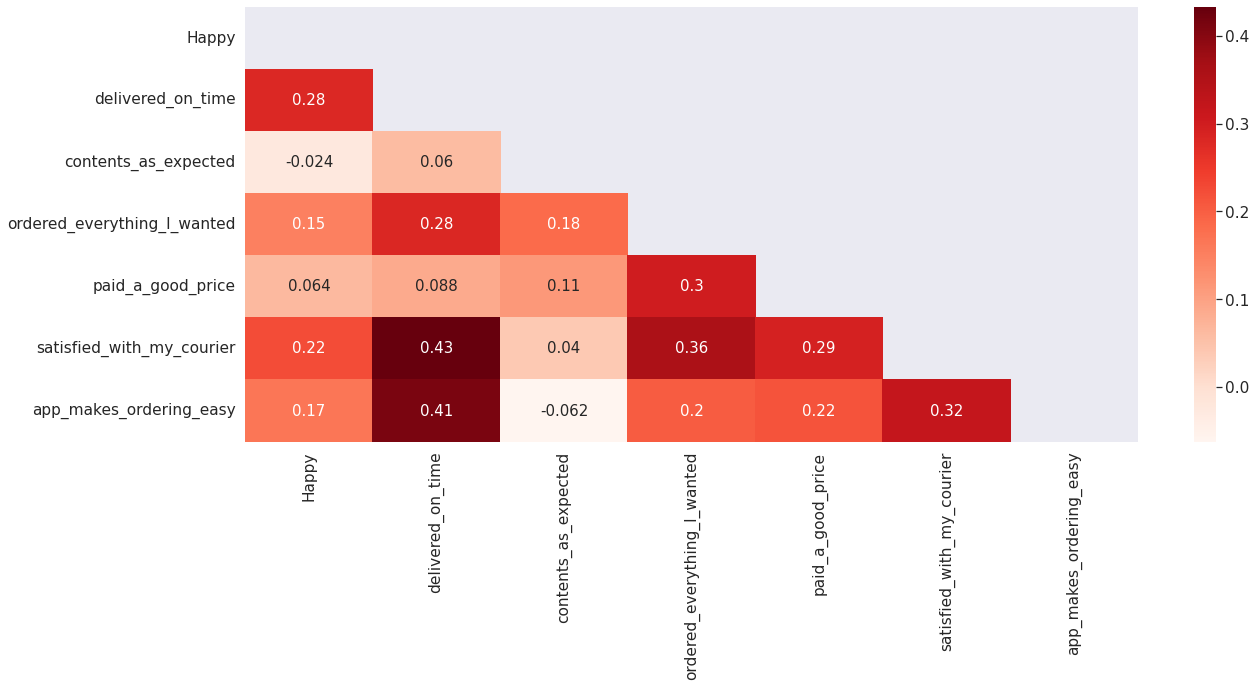

In [ ]:
## Correlation Heatmap

sns.set(font_scale=1.4)
# correlation 
cor = data.corr('pearson')
matrix = np.triu(cor)

# heatmap to visualise the correlation
plt.figure(figsize=(20,8))
sns.heatmap(cor,annot=True, cmap=plt.cm.Reds, mask=matrix,annot_kws={'size': 15})
plt.show()

Positively correlated (cor.coeff. > .3=threshold):
  - delivered_on_time with app_makes_ordering_easy and satisfied_with_my_courier
  - ordered_everything_I_wanted with paid_a_good_price and    satisfied_with_my_courier
  - app_makes_ordering_easy with satisfied_with_my_courier

Note:
  - The target variable (Happy) is (+vely)correlated the most with delivered_on_time and satisfied_with_my_courier.

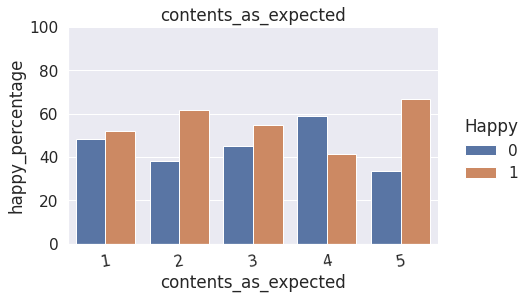

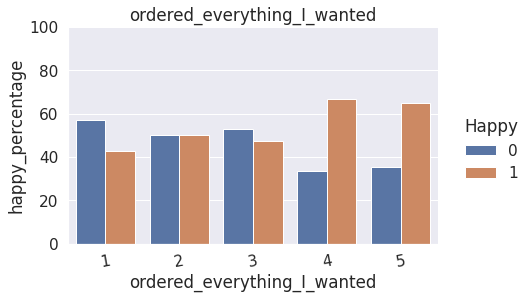

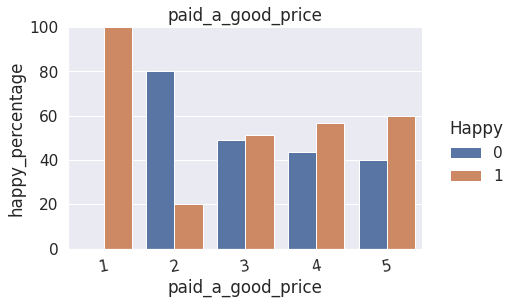

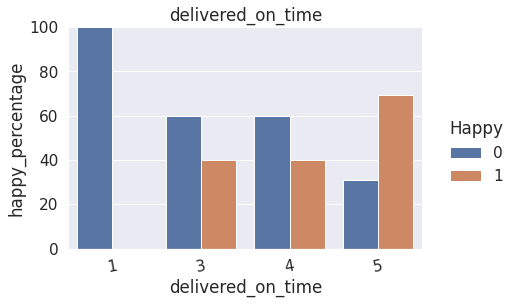

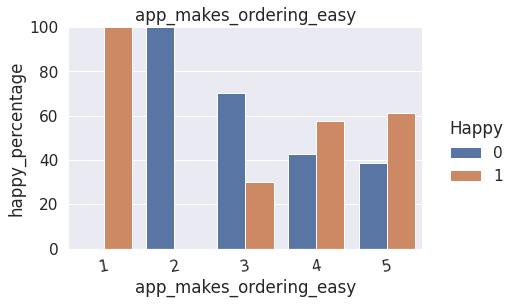

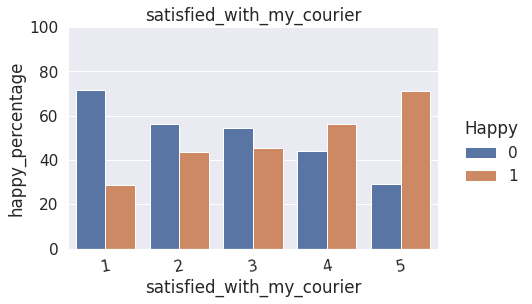

In [ ]:
list1 = ['contents_as_expected',
         'ordered_everything_I_wanted',
         'paid_a_good_price',
         'delivered_on_time','app_makes_ordering_easy', 
         'satisfied_with_my_courier']
         
for col in range(len(list1)):
        x,y = list1[col], 'Happy'

        
        df2 = data.groupby(x)[y].value_counts(normalize=True)
        df2 = df2.mul(100)
        df2 = df2.rename('happy_percentage').reset_index()
        
        # plot
        g = sns.catplot(x=x,y='happy_percentage',hue=y,kind='bar',data=df2)
        g.fig.set_size_inches(8,4)
        g.ax.set_title(str(list1[col]))
        g.ax.set_ylim(0,100)
        # set rotation
        g.set_xticklabels(rotation=10)
        plt.tight_layout

        # # Set XX.XX% onto the figure
        # for p in g.ax.patches:
        #     txt = str(p.get_height().round(2)) + '%'
        #     txt_x = p.get_x() 
        #     txt_y = p.get_height()
        #     g.ax.text(txt_x,txt_y,txt)

- contents_as_expected: people who gave a 4 are mostly unhappy. We would expect them to be happy with such a high rate. People who gave a 1-3 are mostly happy.
Maybe this does not count that much in the final result.

- ordered_everything_I_wanted: seems fine.

- paid_a_good_price: all people who gave a 1 are happy. We would expect them to be unhappy. Maybe this does not count that much in the final result.

- delivered_on_time: We notice that noone gave a 2, which is fine. 

- app_makes_ordering_easy: all people who gave a 1 are happy. We would expect them to be unhappy. Maybe this does not count that much in the final result.

- satisfied_with_my_courier: seems fine.

In [ ]:
data['contents_as_expected'].value_counts()

3    42
2    34
1    27
4    17
5     6
Name: contents_as_expected, dtype: int64

In [ ]:
## Is having the contents I wanted delivered enough to be happy? 
per1 = data[(data['contents_as_expected']>=4) & (data['Happy']==0)].shape[0] / (17+6) * 100
per11 = data[(data['contents_as_expected']==3) & (data['Happy']==0)].shape[0] / (42) * 100
per12 = data[(data['contents_as_expected']<=2) & (data['Happy']==0)].shape[0] / (34+27) * 100

print(f'{round(per1,2)}% of those who gave a 4 or a 5 were unhappy.')
print(f'{round(per11,2)}% of those who gave a 3 were unhappy.')
print(f'{round(per12,2)}% of those who gave a 2 or a 1 were unhappy.')

52.17% of those who gave a 4 or a 5 were unhappy.
45.24% of those who gave a 3 were unhappy.
42.62% of those who gave a 2 or a 1 were unhappy.


In [ ]:
data['delivered_on_time'].value_counts()

5    65
4    40
3    20
1     1
Name: delivered_on_time, dtype: int64

In [ ]:
## only one person gave a 1 for delivering on time
data[data['delivered_on_time']==1]

,Happy,delivered_on_time,contents_as_expected,ordered_everything_I_wanted,paid_a_good_price,satisfied_with_my_courier,app_makes_ordering_easy
47,0,1,1,1,3,1,4


In [ ]:
## Is delivering on time enough to be happy? 
per2 = data[(data['delivered_on_time']>=4) & (data['Happy']==0)].shape[0] / (40+65) * 100
per21 = data[(data['delivered_on_time']==3) & (data['Happy']==0)].shape[0] / (20) * 100

print(f'{round(per2,2)}% of those who gave a 4 or a 5 were unhappy.')
print(f'{round(per21,2)}% of those who gave a 3 were unhappy.')

41.9% of those who gave a 4 or a 5 were unhappy.
60.0% of those who gave a 3 were unhappy.


In [ ]:
data['satisfied_with_my_courier'].value_counts()

4    50
5    31
3    22
2    16
1     7
Name: satisfied_with_my_courier, dtype: int64

In [ ]:
## Is being satisfied with my courier enough to be happy?
per3 = data[(data['satisfied_with_my_courier']>=4) & (data['Happy']==0)].shape[0] / (50+31) * 100
per31 = data[(data['satisfied_with_my_courier']==3) & (data['Happy']==0)].shape[0] / (22) * 100
per32 = data[(data['satisfied_with_my_courier']<=2) & (data['Happy']==0)].shape[0] / (16+7) * 100

print(f'{round(per3,2)}% of those who gave a 4 or a 5 were unhappy.')
print(f'{round(per31,2)}% of those who gave a 3 were unhappy.')
print(f'{round(per32,2)}% of those who gave a 2 or a 1 were unhappy.')

38.27% of those who gave a 4 or a 5 were unhappy.
54.55% of those who gave a 3 were unhappy.
60.87% of those who gave a 2 or a 1 were unhappy.


In [ ]:
data['paid_a_good_price'].value_counts()

4    53
3    41
5    25
2     5
1     2
Name: paid_a_good_price, dtype: int64

In [ ]:
per4 = data[(data['paid_a_good_price']>=4) & (data['Happy']==0)].shape[0] / (53+25) * 100
per41 = data[(data['paid_a_good_price']==3) & (data['Happy']==0)].shape[0] / (41) * 100
per42 = data[(data['paid_a_good_price']<=2) & (data['Happy']==0)].shape[0] / (5+2) * 100

print(f'{round(per4,2)}% of those who gave a 4 or a 5 were unhappy.')
print(f'{round(per41,2)}% of those who gave a 3 were unhappy.')
print(f'{round(per42,2)}% of those who gave a 2 or a 1 were unhappy.')

42.31% of those who gave a 4 or a 5 were unhappy.
48.78% of those who gave a 3 were unhappy.
57.14% of those who gave a 2 or a 1 were unhappy.


In [ ]:
data['ordered_everything_I_wanted'].value_counts()

3    55
4    33
5    17
2    14
1     7
Name: ordered_everything_I_wanted, dtype: int64

In [ ]:
per5 = data[(data['ordered_everything_I_wanted']>=4) & (data['Happy']==0)].shape[0] / (33+17) * 100
per51 = data[(data['ordered_everything_I_wanted']==3) & (data['Happy']==0)].shape[0] / (55) * 100
per52 = data[(data['ordered_everything_I_wanted']<=2) & (data['Happy']==0)].shape[0] / (7+14) * 100

print(f'{round(per5,2)}% of those who gave a 4 or a 5 were unhappy.')
print(f'{round(per51,2)}% of those who gave a 3 were unhappy.')
print(f'{round(per52,2)}% of those who gave a 2 or a 1 were unhappy.')

34.0% of those who gave a 4 or a 5 were unhappy.
52.73% of those who gave a 3 were unhappy.
52.38% of those who gave a 2 or a 1 were unhappy.


In [ ]:
data['app_makes_ordering_easy'].value_counts()

5    57
4    47
3    20
2     1
1     1
Name: app_makes_ordering_easy, dtype: int64

In [ ]:
per6 = data[(data['app_makes_ordering_easy']>=4) & (data['Happy']==0)].shape[0] / (47+57) * 100
per61 = data[(data['app_makes_ordering_easy']==3) & (data['Happy']==0)].shape[0] / (20) * 100
per62 = data[(data['app_makes_ordering_easy']<=2) & (data['Happy']==0)].shape[0] / (2) * 100

print(f'{round(per6,2)}% of those who gave a 4 or a 5 were unhappy.')
print(f'{round(per61,2)}% of those who gave a 3 were unhappy.')
print(f'{round(per62,2)}% of those who gave a 2 or a 1 were unhappy.')

40.38% of those who gave a 4 or a 5 were unhappy.
70.0% of those who gave a 3 were unhappy.
50.0% of those who gave a 2 or a 1 were unhappy.


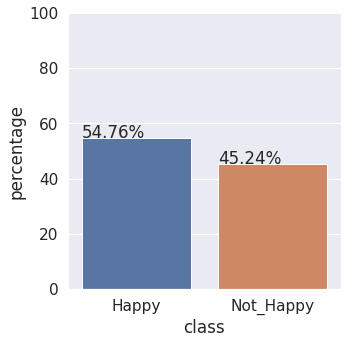

In [ ]:
## Check for imbalanced data
df_ = data['Happy'].value_counts(normalize=True)
df_ = df_.mul(100)
df_ = df_.rename('percentage').reset_index()
df_['class'] = ['Happy','Not_Happy']
g = sns.catplot(x='class',y='percentage',kind='bar',data=df_)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

- Our data seems to be balanced.

In [ ]:
## distributions
for col in data.columns[1:]:
  plt.figure()
  sns.histplot(data=data, x=col, kde=True)

In [ ]:
data.to_csv('data.csv')